In [1]:
import matplotlib.pyplot as plt
# coding=utf-8
# get_ipython().run_line_magic('matplotlib', 'inline')
import pandas as pd
import numpy as np
from keras.layers.core import Flatten

import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Dense, Embedding, SpatialDropout1D
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import Dropout,LSTM,BatchNormalization,Conv1D,MaxPool1D,Reshape,Input,Conv2D
from tensorflow.keras.optimizers import SGD
from sklearn.utils import shuffle
from sklearn.metrics import roc_auc_score
import re
import torch
from keras.utils.vis_utils import plot_model
import math 


In [2]:
dataset = pd.read_csv('./Pistachio_Dataset/Pistachio_28_Features_Dataset/Pistachio_28_Features_Dataset.csv') 
cols = ['Class','Area', 'Perimeter', 'Major_Axis', 'Minor_Axis', 'Eccentricity',
        'Eqdiasq', 'Solidity', 'Convex_Area', 'Extent', 'Aspect_Ratio',
        'Roundness', 'Compactness', 'Shapefactor_1', 'Shapefactor_2',
        'Shapefactor_3', 'Shapefactor_4', 'Mean_RR', 'Mean_RG', 'Mean_RB',
        'StdDev_RR', 'StdDev_RG', 'StdDev_RB', 'Skew_RR', 'Skew_RG', 'Skew_RB',
        'Kurtosis_RR', 'Kurtosis_RG', 'Kurtosis_RB']
# dataset = dataset.loc[:,cols]
# d = {'Class': dataset['Class'].value_counts().index, 'count': dataset['Class'].value_counts()}
# df_Class = pd.DataFrame(data=d).reset_index(drop=True)
# df_Class

dataset.sample(10)

,Area,Perimeter,Major_Axis,Minor_Axis,Eccentricity,Eqdiasq,Solidity,Convex_Area,Extent,Aspect_Ratio,...,StdDev_RR,StdDev_RG,StdDev_RB,Skew_RR,Skew_RG,Skew_RB,Kurtosis_RR,Kurtosis_RG,Kurtosis_RB,Class
766,84561,2020.3459,500.4059,242.4451,0.8748,328.1256,0.8579,98567,0.6699,2.0640,...,22.5937,23.7850,23.3334,-0.8506,-0.7833,-0.6849,2.8545,2.7554,2.7177,Kirmizi_Pistachio
1879,93715,1297.0000,495.9520,242.0692,0.8728,345.4297,0.9788,95748,0.8001,2.0488,...,18.9635,19.1980,19.6101,-0.9200,-0.8737,-0.6758,3.3452,3.2793,3.4488,Siirt_Pistachio
377,68290,1236.1790,439.6265,200.1081,0.8904,294.8720,0.9673,70597,0.7652,2.1969,...,25.8404,27.2885,29.3617,-0.9461,-0.8359,-0.7615,2.8244,2.6158,2.5660,Kirmizi_Pistachio
584,73496,1118.4030,414.9055,227.9002,0.8356,305.9052,0.9738,75474,0.7397,1.8206,...,21.6237,22.9490,21.5302,-0.6926,-0.6324,-0.4304,2.4142,2.2298,2.5626,Kirmizi_Pistachio
1322,95744,1344.7400,486.1907,273.9415,0.8262,349.1490,0.8889,107705,0.7280,1.7748,...,21.7916,25.7564,23.4475,-0.7043,-0.6322,-0.4200,2.4659,2.3822,2.2293,Siirt_Pistachio
1300,104952,1309.2030,470.0492,295.9375,0.7769,365.5531,0.9348,112267,0.7297,1.5883,...,19.5857,23.3758,24.6418,-1.1376,-1.0231,-0.9553,4.1631,3.5007,3.6535,Siirt_Pistachio
556,84143,1170.3860,474.2799,227.7225,0.8772,327.3136,0.9864,85307,0.7556,2.0827,...,22.9112,24.6619,24.8875,-0.9349,-0.7006,-0.4097,3.3906,2.8394,2.5640,Kirmizi_Pistachio
49,60803,1317.9060,413.8860,195.5904,0.8813,278.2387,0.9106,66769,0.6834,2.1161,...,22.7933,23.7798,22.8103,-1.0110,-0.9310,-0.6495,3.2229,3.1221,3.0700,Kirmizi_Pistachio
785,73607,1070.1479,428.6051,219.3727,0.8591,306.1361,0.9909,74281,0.7982,1.9538,...,18.6741,18.9521,21.7716,-1.0000,-0.5618,0.0594,4.0868,3.5127,3.3700,Kirmizi_Pistachio
1263,92868,1163.1219,435.7098,273.1259,0.7791,343.8651,0.9920,93616,0.7304,1.5953,...,21.1671,21.9591,22.2506,-0.2361,-0.1603,-0.1153,2.3393,2.2724,2.1015,Siirt_Pistachio


In [3]:
dataset = shuffle(dataset)
Lisclass = dataset['Class'].values
LisClassNp = []
for i in range(len(Lisclass)):
    if (Lisclass[i] == 'Kirmizi_Pistachio'):
        LisClassNp.append([0,1])
    else:
        LisClassNp.append([1,0])
Y = np.array(LisClassNp)
dataset = dataset.drop(columns='Class')
X = dataset.values
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
X = scaler.fit_transform(X)
#拆分训练集和测试集
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.10, random_state=40)
X_train = X_train.reshape(X_train.shape[0],1,X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0],1,X_test.shape[1])

In [4]:
# d = {'Class': dataset['Class'].value_counts().index, 'count': dataset['Class'].value_counts()}
# df_Class = pd.DataFrame(data=d).reset_index(drop=True)
# df_Class 


In [5]:
#X.dtype = 'int64'
# Y.dtype = 'int64'
# X = X.astype(int)

# X = X.astype(int)

In [6]:
print(X.shape)
print(Y.shape)

(2114, 28)
(2114, 2)


In [7]:
import os,sys
import shutil

shutil.rmtree('models')  
os.mkdir('models')

In [8]:
# import tensorflow as tf
# def metric_precision(y_true,y_pred):
#     TP=tf.reduce_sum(y_true/tf.round(y_pred))
#     TN=tf.reduce_sum((1-y_true)(1-tf.round(y_pred)))
#     FP=tf.reduce_sum((1-y_true)tf.round(y_pred))
#     FN=tf.reduce_sum(y_true(1-tf.round(y_pred)))
#     precision=TP/(TP+FP)
#     return precision

In [9]:
def accsorce(Y_test,yhat):
    sorce = 0
    for i in range(len(Y_test)):
        sorce += roc_auc_score(Y_test[i], yhat[i])

    return sorce/len(Y_test)

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=40)
X_train = X_train.reshape(X_train.shape[0],1,X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0],1,X_test.shape[1])

In [11]:
print(type(X_train))

<class 'numpy.ndarray'>


In [12]:
# X_train = torch.from_numpy(X_train)
# Y_train = tuple(map(tuple, Y_train))

In [13]:
# def Input():
#     X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=40)
#     X_train = X_train.reshape(X_train.shape[0],1,X_train.shape[1])
#     X_test = X_test.reshape(X_test.shape[0],1,X_test.shape[1])
#     X = np.array(X)
#     return torch.from_numpy(X)

In [14]:
# def sigmoid(x):
#     return  1/(1+np.exp(-x))

In [15]:
# 参考LSTM结构图
# https://blog.csdn.net/weixin_42175217/article/details/106183682
class ConvLSTM(Model):
    def __init__(self, inp_dim, oup_dim, kernel, dilation):
        super().__init__()
        pad_x = int(dilation * (kernel - 1) / 2)
        self.conv_xf = Conv2D(inp_dim, oup_dim, kernel, padding=pad_x, dilation=dilation)
        self.conv_xi = Conv2D(inp_dim, oup_dim, kernel, padding=pad_x, dilation=dilation)
        self.conv_xo = Conv2D(inp_dim, oup_dim, kernel, padding=pad_x, dilation=dilation)
        self.conv_xj = Conv2D(inp_dim, oup_dim, kernel, padding=pad_x, dilation=dilation)

        pad_h = int((kernel - 1) / 2)
        self.conv_hf = Conv2D(oup_dim, oup_dim, kernel, padding=pad_h)
        self.conv_hi = Conv2D(oup_dim, oup_dim, kernel, padding=pad_h)
        self.conv_ho = Conv2D(oup_dim, oup_dim, kernel, padding=pad_h)
        self.conv_hj = Conv2D(oup_dim, oup_dim, kernel, padding=pad_h)

        self.relu = np.LeakyReLU(0.2)

    def forward(self, x, pair=None):
        if pair is None:
            i = np.sigmoid(self.conv_xi(x))
            o = np.sigmoid(self.conv_xo(x))
            j = np.tanh(self.conv_xj(x))
            c = i * j
            h = o * c
        else:
            h, c = pair
            f = np.sigmoid(self.conv_xf(x) + self.conv_hf(h))
            i = np.sigmoid(self.conv_xi(x) + self.conv_hi(h))
            o = np.sigmoid(self.conv_xo(x) + self.conv_ho(h))
            j = np.tanh(self.conv_xj(x) + self.conv_hj(h))
            c = f * c + i * j
            h = o * np.tanh(c)

        h = self.relu(h)
        return h, [h, c]

In [16]:
class my_model(Model):
    def __init__(self, input_shape, **kwargs):
        super().__init__(**kwargs) 
        
        the_units = 128
        self.CNN   = Conv1D(the_units,1,padding="valid",activation="relu")
        self.POLL  = MaxPool1D(1)
        self.FLATT = Flatten()
        self.LSTM0 = LSTM(the_units,return_sequences=True,
                        kernel_initializer=tf.keras.initializers.glorot_normal(seed=2),bias_initializer=tf.keras.initializers.Zeros())
        self.LSTM1 = LSTM(the_units,return_sequences=True)
        self.LSTM2 = LSTM(the_units)
        self.BAT   = BatchNormalization()
        self.DROP  = Dropout(rate=0.3)
        self.DENS  = Dense(8, activation='relu')
        self.OUT   = Dense(2, activation='softmax')
        self.resha = Reshape((1, 28))
        
        # 模型的参数
        self.input_layer = tf.keras.layers.Input(input_shape)
        self.out = self.call(self.input_layer)
        
        super().__init__( inputs=self.input_layer,outputs=self.out, **kwargs)
    
    # 初始化模型的参数
    def build(self):
        self._is_graph_network = True
        self._init_graph_network(inputs=self.input_layer,outputs=self.out)
    
    def call(self, inputdata, **kwargs):
                
        #x1 = self.LSTM0(inputdata)
        print('inputdata',inputdata)
        x1 = self.CNN(inputdata)
        #x1 = self.LSTM0(inputdata)
        x1 = self.POLL(x1)
        c = self.DROP(x1)
        #c = self.BAT(x1)

        c = self.LSTM1(c)
        c = self.DROP(c)
        c = self.BAT(c)
        
        c = self.LSTM1(c)
        c = self.DROP(c)
        c = self.BAT(c)
        
        # # d = self.LSTM2(c)
        # # d = self.BAT(d)
        # c = self.LSTM1(c)
        # c = self.DROP(c)
        # c = self.BAT(c)
                        
        d = self.DENS(c)
        d = self.DROP(d)
        
        d = self.FLATT(d)
        out = self.OUT(d)
        return out
    # AFAIK: The most convenient method to print model.summary() 
    # similar to the sequential or functional API like.
    def build_graph(self):
        #x = Input(shape=(dim))
        x = Input()
        return Model(inputs=[x], outputs=self.call(x))

mymodel2 = my_model((1,28), name='MyModelMLP')
# mymodel2(X_train)
mymodel2.summary()


inputdata KerasTensor(type_spec=TensorSpec(shape=(None, 1, 28), dtype=tf.float32, name='input_1'), name='input_1', description="created by layer 'input_1'")
Model: "MyModelMLP"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 1, 28)]      0                                            
__________________________________________________________________________________________________
conv1d (Conv1D)                 (None, 1, 128)       3712        input_1[0][0]                    
__________________________________________________________________________________________________
max_pooling1d (MaxPooling1D)    (None, 1, 128)       0           conv1d[0][0]                     
__________________________________________________________________________________________________
dropout (Dropout)              

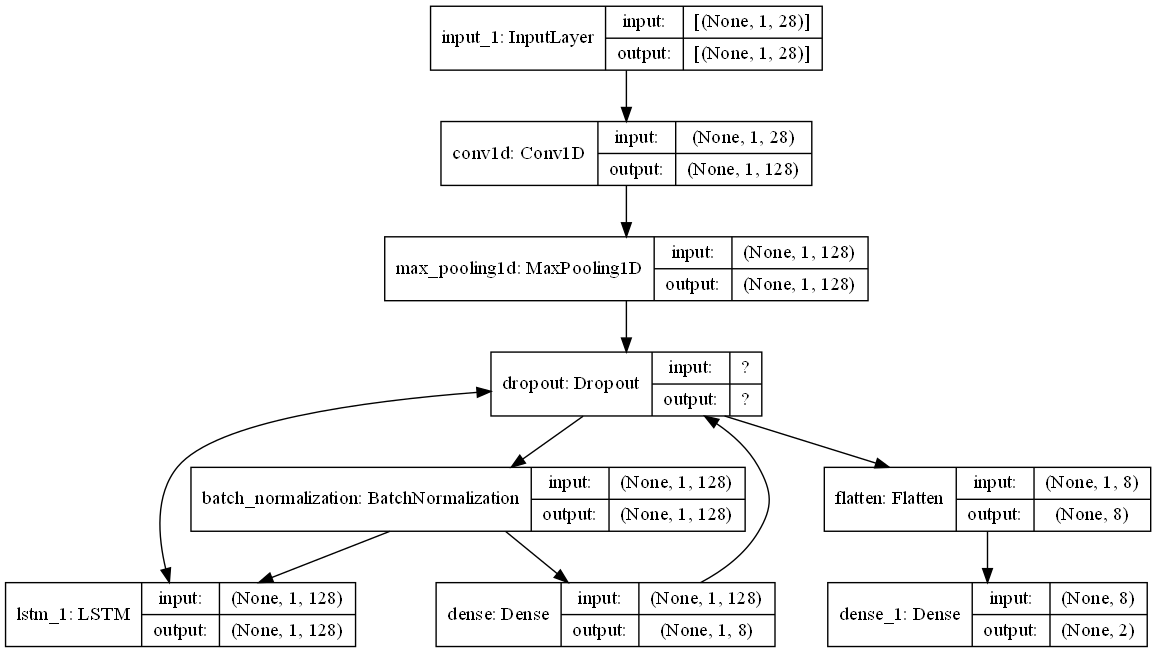

In [17]:
plot_model(mymodel2, to_file='mymodel2.png', show_shapes=True, 
                        show_layer_names=True, rankdir='TB', dpi=100, expand_nested=True)


In [18]:
Epoch = 100  # 模型迭代的次数
Batch_Size = 64  # 批量训练的样本的个数
Out_Class = 2  # 输出的类别的个数,0-9共10类
# 模型编译
#mYMODEL = my_model((1,28),name="mYMODEL")
#mYMODEL(X_train)
mymodel2.compile(loss='binary_crossentropy',#categorical_crossentropy', binary_crossentropy
                optimizer='adam', metrics=['categorical_accuracy'])  

# train_label_cate = tf.keras.utils.to_categorical(train_labels, 10)
# testlabels = tf.keras.utils.to_categorical(test_labels, 10)
checkpoint_path = "./models/cp-{categorical_accuracy:.5f}.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# 创建一个回调，保证验证数据集准确率最大
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                save_weights_only=True,
                                                monitor='categorical_accuracy',
                                                mode='max',
                                                verbose=2,
                                                save_best_only=True)
#                                              filepath=filepath,
#                                             save_weights_only=False,
#                                             monitor='categorical_accuracy',
#                                             mode='max',
#                                             save_best_only=True)

# 动态更改学习率：在模型的回调中使用
def scheduler(epoch):  # 根据epoch动态更改学习率的参数
    if epoch < 10:
        return 0.13
    else:
        return 0.13 * tf.math.exp(0.1 * (10 - epoch))
    
lr_back = tf.keras.callbacks.LearningRateScheduler(scheduler)


In [19]:
mymodel2.fit(X_train,Y_train, batch_size=Batch_Size, 
            epochs=Epoch, verbose=2, validation_split=0.1, 
            callbacks=cp_callback)
            #callbacks=[cp_callback, lr_back])


Epoch 1/100
inputdata Tensor("IteratorGetNext:0", shape=(None, 1, 28), dtype=float32)
inputdata Tensor("IteratorGetNext:0", shape=(None, 1, 28), dtype=float32)
inputdata Tensor("IteratorGetNext:0", shape=(None, 1, 28), dtype=float32)
27/27 - 8s - loss: 0.7650 - categorical_accuracy: 0.6137 - val_loss: 0.6877 - val_categorical_accuracy: 0.5602

Epoch 00001: categorical_accuracy improved from -inf to 0.61368, saving model to ./models\cp-0.61368.ckpt
Epoch 2/100
27/27 - 0s - loss: 0.5787 - categorical_accuracy: 0.7481 - val_loss: 0.6753 - val_categorical_accuracy: 0.5602

Epoch 00002: categorical_accuracy improved from 0.61368 to 0.74810, saving model to ./models\cp-0.74810.ckpt
Epoch 3/100
27/27 - 0s - loss: 0.5064 - categorical_accuracy: 0.8153 - val_loss: 0.6580 - val_categorical_accuracy: 0.5759

Epoch 00003: categorical_accuracy improved from 0.74810 to 0.81531, saving model to ./models\cp-0.81531.ckpt
Epoch 4/100
27/27 - 0s - loss: 0.4616 - categorical_accuracy: 0.8469 - val_loss: 0

In [20]:
# 评估模型,按照模型最后的参数计算
test_loss, test_acc = mymodel2.evaluate(X_test, Y_test)

print('测试数据集成本：{:.8f},准确率{:.8f}%%'. format(test_loss, 100*test_acc))


best_para = tf.train.latest_checkpoint(checkpoint_dir)
print('最优的参数文件：', best_para)
#best_para = './models\cp-0.92987.ckpt'
mymodel2.load_weights(best_para)

predict_loss, predict_acc = mymodel2.evaluate(X_test, Y_test)
print('使用训练后的参数','成本:', predict_loss, '准确率', predict_acc)

7/7 [==============================] - 0s 2ms/step - loss: 0.3302 - categorical_accuracy: 0.8821
测试数据集成本：0.33020797,准确率88.20754886%%


最优的参数文件： ./models\cp-0.92051.ckpt
7/7 [==============================] - 0s 2ms/step - loss: 0.3158 - categorical_accuracy: 0.9104
使用训练后的参数 成本: 0.3158160150051117 准确率 0.9103773832321167


In [22]:
# del mymodel2
# # 参数加载
# # 新的模型结构保持一致。
# model_new = my_model((1,28))
# #mymodel2 = my_model((1,28), name='MyModelMLP')
# # 需要经过编译，参数也要和原来的一致
# model_new.compile(loss='binary_crossentropy',#categorical_crossentropy', binary_crossentropy
#                 optimizer='adam', metrics=['categorical_accuracy'])  
# # checkpoint_path = "./models/cp-{categorical_accuracy:.5f}.ckpt"
# # checkpoint_dir = os.path.dirname(checkpoint_path)
# # 加载已经训练好的参数
# best_para = tf.train.latest_checkpoint(checkpoint_dir)
# print('最优的参数文件：', best_para)
# model_new.load_weights(best_para)
# predict_loss, predict_acc = model_new.evaluate(X_test, Y_test)
# print('使用训练后的参数','成本:', predict_loss, '准确率', predict_acc)


In [23]:
# class my_model(Model):
#     def __init__(self, dim):
#         super(my_model, self).__init__()
#         the_units = 128
#         self.CNN   = Conv1D(16,5,padding="same",activation="relu",input_shape=(dim))
#         self.POLL  = MaxPool1D(2)
#         self.FLATT = Flatten()
#         self.LSTM1 = LSTM(the_units,return_sequences=True)
#         self.LSTM2 = LSTM(the_units)
#         self.BAT   = BatchNormalization()
#         self.DROP  = Dropout(rate=0.1)
#         self.DENS  = Dense(the_units, activation='relu')
#         self.OUT   = Dense(2, activation='sigmoid')
#         self.resha = Reshape((None,1, 128))
    
#     def call(self, inputs):
#         x = self.CNN(inputs)
#         x = self.POLL(x)
#         x = self.FLATT(x)
#         x = self.DENS(x)
        
#         a = self.resha(x)
        
#         b = self.LSTM1(a)
#         b = self.DROP(a)
#         b = self.BAT(b)
        
#         c = self.LSTM2(b)
#         c = self.DROP(c)
#         c = self.BAT(c)
        
#         d = self.DENS(c)
#         d = self.DROP(d)
#         return self.OUT(d)
    
#     # AFAIK: The most convenient method to print model.summary() 
#     # similar to the sequential or functional API like.
#     # def build_graph(self):
#     #     x = Input(shape=(dim))
#     #     return Model(inputs=[x], outputs=self.call(x))

# # dim = (124,124,3)
# # model = my_model((dim))
# # model.build((None, *dim))
# # model.build_graph().summary()
# dim = (None,28,1)
# model = my_model(dim)
# model.build(input_shape=dim)
# model.summary()

# model = tf.keras.utils.plot_model(model=model,
#         show_shapes=True, to_file='model.png')

In [24]:

# #定义模型
# import random
# from string import printable
# from tokenize import Double
# sgd = SGD(learning_rate=0.1, decay=1e-6, momentum=0.9, nesterov=True)

# # lstm_layers = [1,2,3,4,5]
# # dense_layers = [1,2,3,4,5,6]
# # units = [16,32,64,128]
# # dropout = [0.05,0.1,0.15,0.25]
# # Batch_size = [32,64,128]
# # optimizer = ['adam',sgd]
# lstm_layers = [2]
# dense_layers = [4]
# units = [256]
# dropout = [0.05]
# Batch_size = [64]
# optimizer = ['adam']
# for the_batch_size in Batch_size:
#     for the_dropout in dropout:
#         for the_optimizer in optimizer:
#             for the_dense_layers in dense_layers:
#                 for the_lstm_layers in lstm_layers:
#                     for the_units in units:
#                         sgd = SGD(learning_rate=0.1, decay=1e-6, momentum=0.9, nesterov=True)
#                         X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=40)
#                         X_train = X_train.reshape(X_train.shape[0],1,X_train.shape[1])
#                         X_test = X_test.reshape(X_test.shape[0],1,X_test.shape[1])
#                         model = Sequential()
#                         # model.build(input_shape=(277,277,2))
#                         #print(model.summary())
#                         #model.add(SpatialDropout1D(0.2))
#                         print(X_train.shape[0],X_train.shape[1],X_train.shape[2])
#                         print('*************')
#                         model.add(Conv1D(16,5,padding="same",activation="relu",input_shape=(X_train.shape[2],1)))
#                         model.add(MaxPool1D(2))
#                         model.add(Flatten())
#                         model.add(Dense(the_dense_layers,activation='relu'))
#                         #model.add(LSTM(the_units ,input_shape=(X_train.shape[1],X_train.shape[2]),return_sequences = True))
#                         model.add(LSTM(the_units,return_sequences=True))
#                         model.add(Dropout(the_dropout))
#                         model.add(BatchNormalization())
#                         # #第二层
#                         for i in range(the_lstm_layers):
#                             model.add(LSTM(the_units,return_sequences=True))
#                             model.add(Dropout(the_dropout))
#                             model.add(BatchNormalization())

#                         model.add(LSTM(the_units))
#                         model.add(Dropout(the_dropout))
#                         model.add(BatchNormalization())
#                         #全连接层
#                         for i in range(the_dense_layers):
#                             model.add(Dense(the_dense_layers,activation='relu'))
#                             model.add(Dropout(the_dropout))
                            
#                         # model.add(Flatten()) 
                        
                        
#                         model.add(Dense(2, activation='softmax'))
                        
#                         #sgd = SGD(learning_rate=0.01, momentum=0.9 , decay=0.1, nesterov=False)
                        
#                         # learning_rate = 0.1
#                         # decay = 0.001
#                         # epochs = 50
#                         # batch_size = 64
                        
                        
#                         model.compile(  loss='binary_crossentropy',#categorical_crossentropy', binary_crossentropy
#                                         optimizer=the_optimizer, metrics=['categorical_accuracy'])
#                         print(model.summary())

#                         epochs = 100
#                         batch_size = the_batch_size
#                         if(the_optimizer == sgd):
#                             the_optimizer = 'sgd'
#                         filepath = './models/{categorical_accuracy:.4f}_{epoch:02d}_'+f'dropout_{the_dropout}_batch_size_{the_batch_size}_optimizer_{the_optimizer}_dense_layers_{the_dense_layers}_lstm_layers_{the_lstm_layers}_unit_{the_units}.h5'
#                         checkpoint = ModelCheckpoint(
#                                             filepath=filepath,
#                                             save_weights_only=False,
#                                             monitor='categorical_accuracy',
#                                             mode='max',
#                                             save_best_only=True)
#                         history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size, validation_split=0.1,
#                                             #callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])
#                                             callbacks=checkpoint)

In [25]:
#model.save('mymodel.h5')

In [26]:
# from tensorflow.keras.models import load_model
# best_model = load_model('./models/0.9557_78_dropout_0.05pbatch_size_32optimizer_adamdense_layers_1_lstm_layers_2_unit_128.h5')

In [27]:
# dataset = pd.read_csv('test.csv') 
# cols = ['Class','Area', 'Perimeter', 'Major_Axis', 'Minor_Axis', 'Eccentricity',
#         'Eqdiasq', 'Solidity', 'Convex_Area', 'Extent', 'Aspect_Ratio',
#         'Roundness', 'Compactness', 'Shapefactor_1', 'Shapefactor_2',
#         'Shapefactor_3', 'Shapefactor_4', 'Mean_RR', 'Mean_RG', 'Mean_RB',
#         'StdDev_RR', 'StdDev_RG', 'StdDev_RB', 'Skew_RR', 'Skew_RG', 'Skew_RB',
#         'Kurtosis_RR', 'Kurtosis_RG', 'Kurtosis_RB']
# # dataset = dataset.loc[:,cols]
# dataset.sample(10)
# dataset = shuffle(dataset)
# Lisclass = dataset['Class'].values
# LisClassNp = []
# for i in range(len(Lisclass)):
#     if (Lisclass[i] == 'Kirmizi_Pistachio'):
#         LisClassNp.append([0,1])
#     else:
#         LisClassNp.append([1,0])
# Y = np.array(LisClassNp)
# dataset = dataset.drop(columns='Class')
# X = dataset.values
# # from sklearn.preprocessing import MinMaxScaler
# # scaler = MinMaxScaler(feature_range=(0, 1))
# # X = scaler.fit_transform(X)
# #进行预测 make a prediction
# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.90, random_state=random.randint(10,100))
# X_train = X_train.reshape(X_train.shape[0],1,X_train.shape[1])
# X_test = X_test.reshape(X_test.shape[0],1,X_test.shape[1])
# # print ('train_x.shape, train_y.shape, test_x.shape, test_y.shape')
# # print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)
# yhat = best_model.predict(X_test)
# # print(yhat.shape)
# print(yhat)
# print(Y_test)
# sorce = 0
# for i in range(len(Y_test)):
#     sorce += roc_auc_score(Y_test[i], yhat[i])

# print('ACC:',sorce/len(Y_test))
# #拆分训练集和测试集
# # X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.10, random_state=random.randint(10,100))
# # X_train = X_train.reshape(X_train.shape[0],1,X_train.shape[1])
# # X_test = X_test.reshape(X_test.shape[0],1,X_test.shape[1])

In [28]:
# print(Y_test.shape)
# print(yhat.shape)
# # Y_test = Y_test.reshape(430)
# # yhat = yhat.reshape(430)
# # Y_test = list(Y_test)
# # yhat = list(yhat)

In [29]:
# print(yhat)